In [3]:
# imports
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm

In [4]:
# read data
file_path = 'Data/processed_data.csv'  # 更改为您的文件路径
data = pd.read_csv(file_path)

# 2 Summary statistics of key fields

## 2.1 Independent variable

#### 2.1.1 Property Type

In [31]:
# Attribute type fields to be counted
prop_type_columns = ['PROP_TYPE_Bungalow', 'PROP_TYPE_Detached', 'PROP_TYPE_End terrace',
                     'PROP_TYPE_Flat', 'PROP_TYPE_Mid terrace', 'PROP_TYPE_Semi detached']

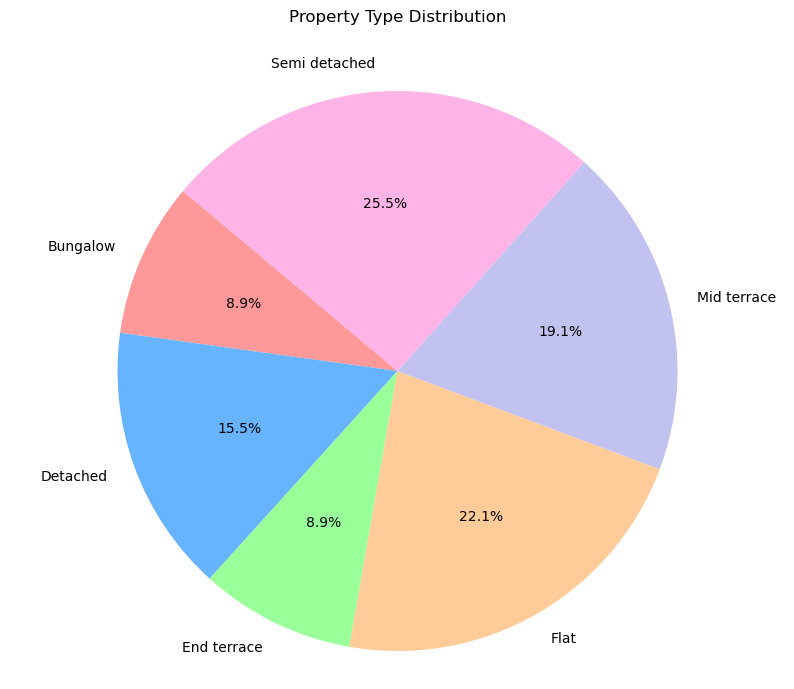

In [34]:
# Calculate the number in each attribute type field
prop_type_counts = data[prop_type_columns].sum()
# Pie charting
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
labels = [label.replace('PROP_TYPE_', '') for label in prop_type_columns]

plt.figure(figsize=(10, 8))
plt.pie(prop_type_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Property Type Distribution', pad=30)  
plt.axis('equal')  
plt.show()

#### 2.1.2 Council Tax Band

In [25]:
# Attribute type fields to be counted
council_tax_columns = ['COUNCIL_TAX_BAND_A', 'COUNCIL_TAX_BAND_B', 'COUNCIL_TAX_BAND_C', 'COUNCIL_TAX_BAND_D',
                     'COUNCIL_TAX_BAND_E', 'COUNCIL_TAX_BAND_F', 'COUNCIL_TAX_BAND_G', 'COUNCIL_TAX_BAND_H']

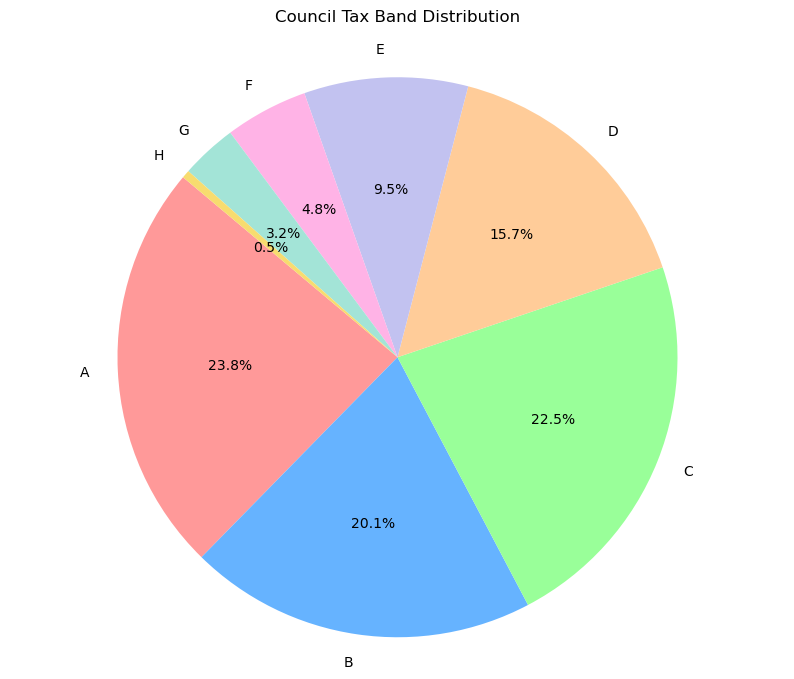

In [49]:
# Calculate the number in each attribute type field
council_tax_counts = data[council_tax_columns].sum()
# Pie charting
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#a3e4d7', '#f7dc6f']
labels = [label.replace('COUNCIL_TAX_BAND_', '') for label in council_tax_columns]

plt.figure(figsize=(10, 8))
plt.pie(council_tax_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Council Tax Band Distribution', pad=20) 
plt.axis('equal') 
plt.show()

#### 2.1.3 Region Band

In [38]:
# Attribute type fields to be counted
region_columns = ['REGION_E12000001', 'REGION_E12000002', 'REGION_E12000003', 'REGION_E12000004', 'REGION_E12000005',
                     'REGION_E12000005', 'REGION_E12000007', 'REGION_E12000008', 'REGION_E12000009']

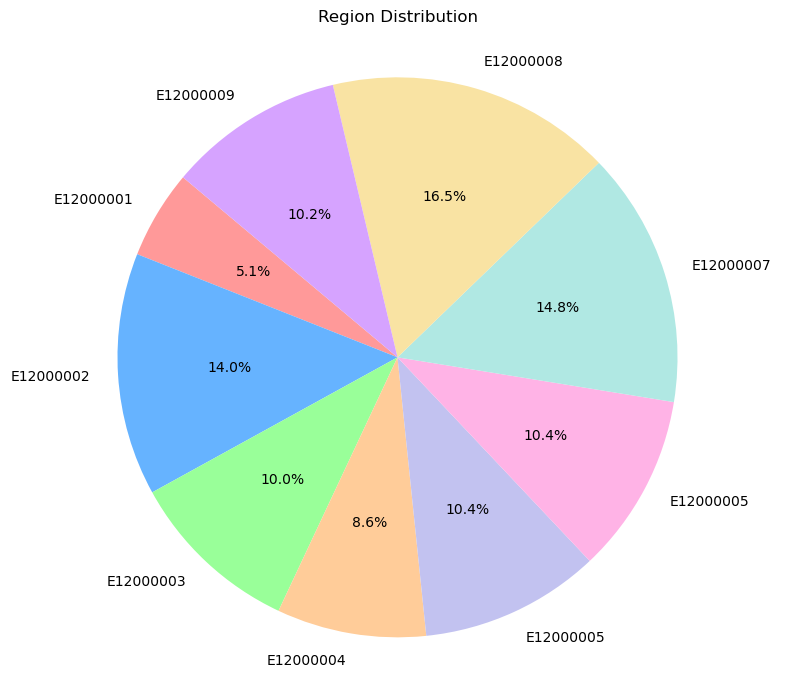

In [43]:
# Calculate the number in each attribute type field
region_columns_counts = data[region_columns].sum()
# Pie charting
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6', '#b0e8e3', '#f9e3a3', '#d6a3ff']
labels = [label.replace('REGION_', '') for label in region_columns]

plt.figure(figsize=(10, 8))
plt.pie(region_columns_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Region Band Distribution', pad=20) 
plt.axis('equal') 
plt.show()

#### 2.1.4 Property Age Band

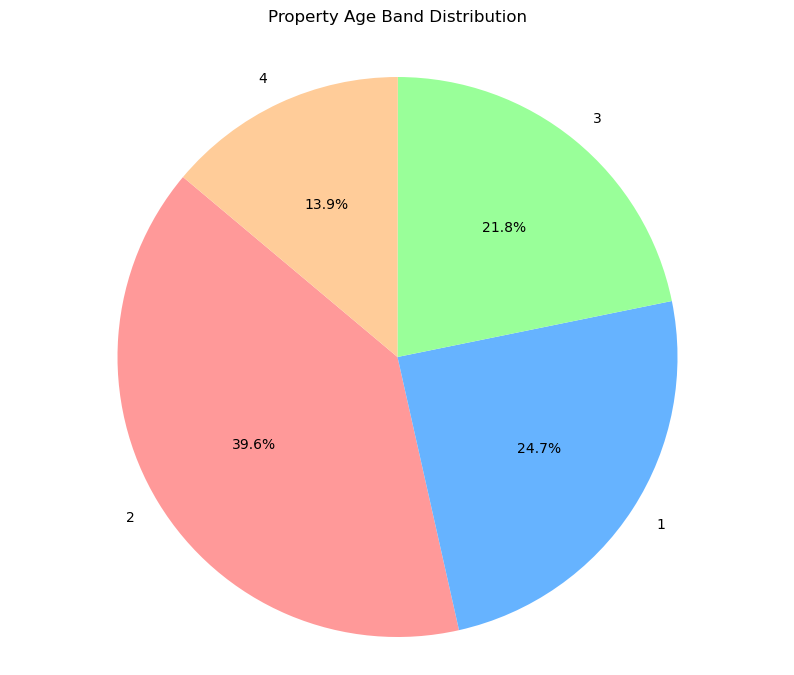

In [50]:
# Check the unique values and counts in the 'PROP_AGE_BAND' column
prop_age_band_counts = data['PROP_AGE_BAND'].value_counts()
# Pie charting
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels_int = prop_age_band_counts.index.astype(int)

plt.figure(figsize=(10, 8))
plt.pie(prop_age_band_counts, labels=labels_int, colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('Property Age Band Distribution', pad=20)
plt.axis('equal')  
plt.show()

#### 2.1.5 Floor Area Band

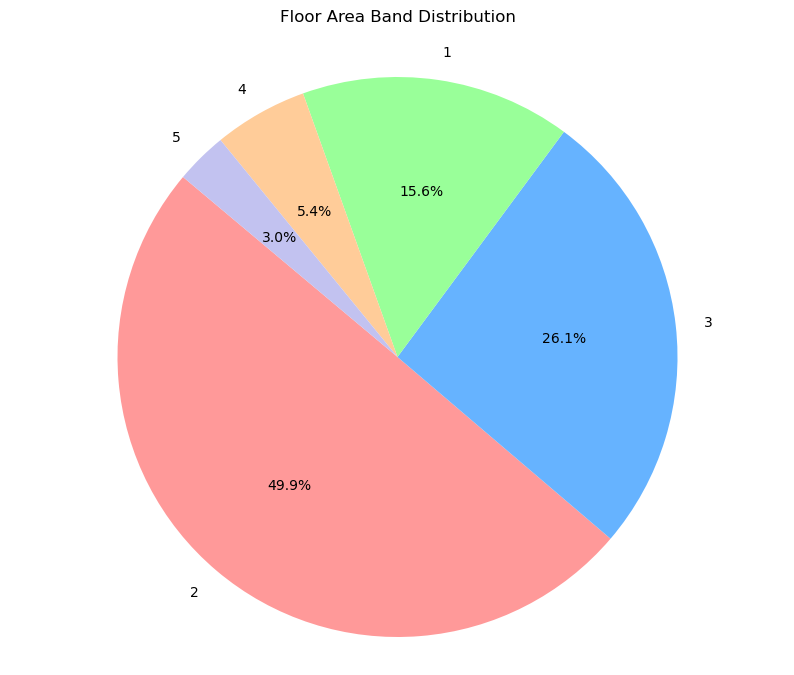

In [55]:
# Check the unique values and counts in the 'FLOOR_AREA_BAND' column
floor_area_band_counts = data['FLOOR_AREA_BAND'].value_counts()
# Pie charting
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
labels_int = floor_area_band_counts.index.astype(int)

plt.figure(figsize=(10, 8))
plt.pie(floor_area_band_counts, labels=labels_int, colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('Floor Area Band Distribution', pad=20)
plt.axis('equal')  
plt.show()

#### 2.1.6 IMD Band

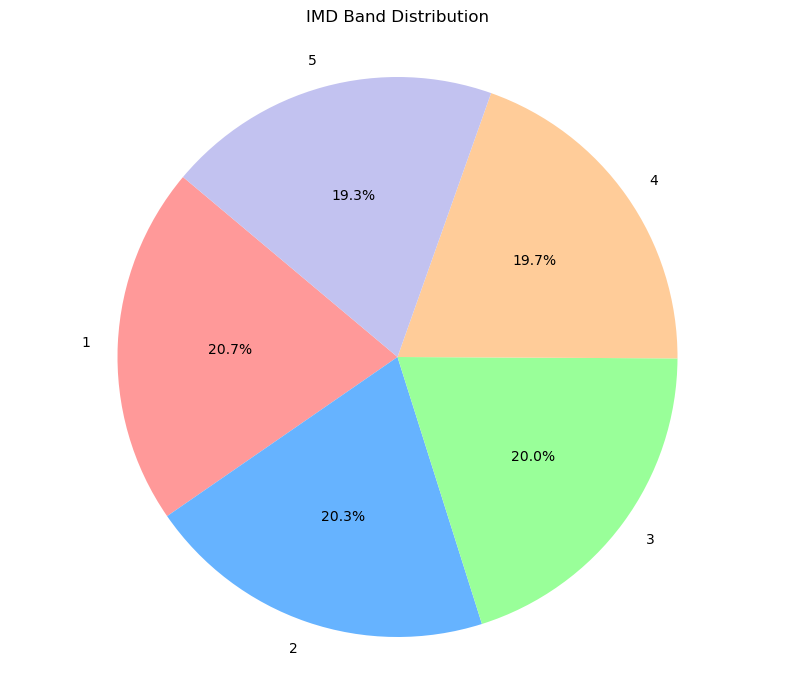

In [56]:
# Check the unique values and counts in the 'IMD_BAND_ENG' column
imd_band_counts = data['IMD_BAND_ENG'].value_counts()
# Pie charting
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
labels_int = imd_band_counts.index.astype(int)

plt.figure(figsize=(10, 8))
plt.pie(imd_band_counts, labels=labels_int, colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('IMD Band Distribution', pad=20)
plt.axis('equal')  
plt.show()

#### 2.1.7 Li Flag

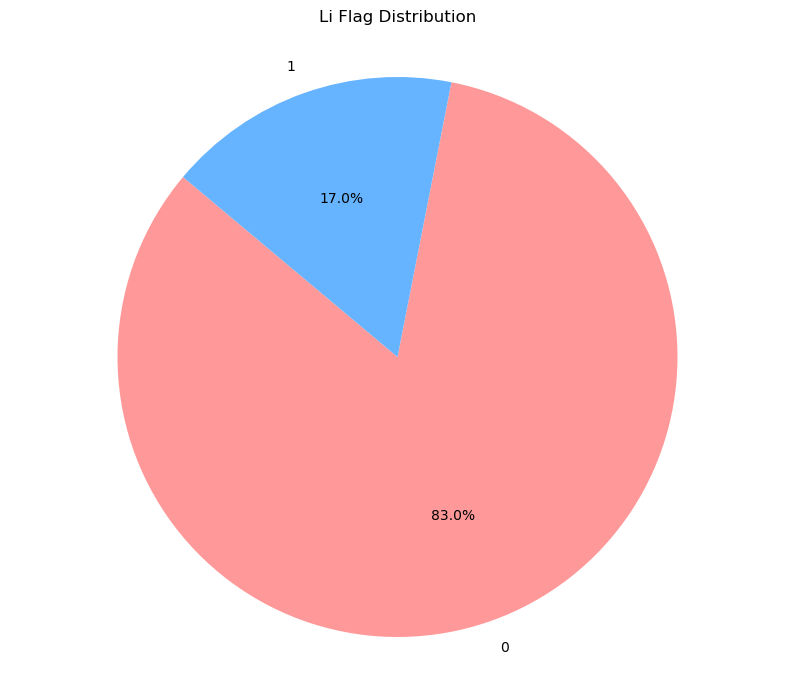

In [57]:
# Check the unique values and counts in the 'LI_FLAG' column
li_flag_counts = data['LI_FLAG'].value_counts()
# Pie charting
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels_int = li_flag_counts.index.astype(int)

plt.figure(figsize=(10, 8))
plt.pie(li_flag_counts, labels=labels_int, colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('Li Flag Distribution', pad=20)
plt.axis('equal')  
plt.show()

#### 2.1.8 CWI Flag

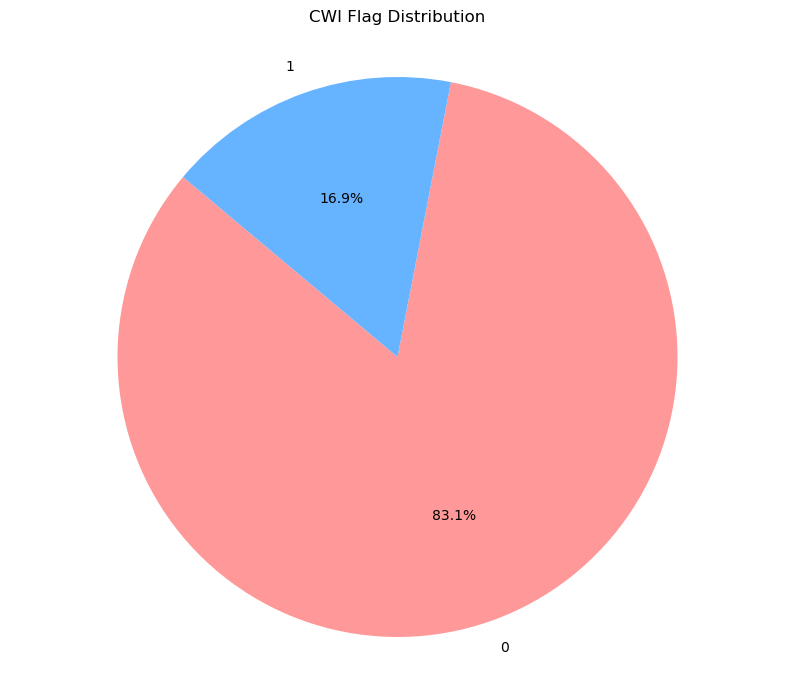

In [59]:
# Check the unique values and counts in the 'CWI_FLAG' column
cwi_flag_counts = data['CWI_FLAG'].value_counts()
# Pie charting
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels_int = cwi_flag_counts.index.astype(int)

plt.figure(figsize=(10, 8))
plt.pie(cwi_flag_counts, labels=labels_int, colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('CWI Flag Distribution', pad=20)
plt.axis('equal')  
plt.show()

#### 2.1.9 PV Flag

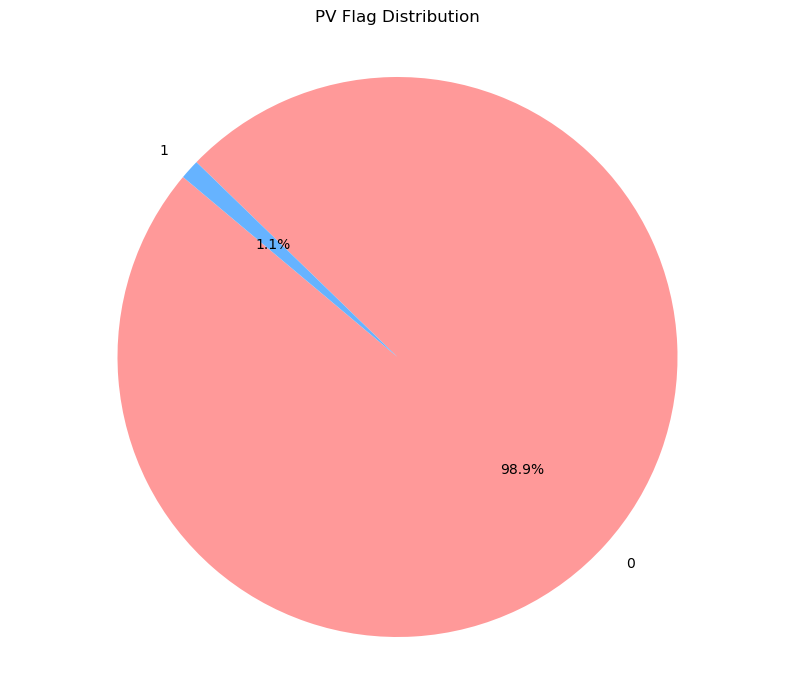

In [60]:
# Check the unique values and counts in the 'PV_FLAG' column
pv_flag_counts = data['PV_FLAG'].value_counts()
# Pie charting
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels_int = pv_flag_counts.index.astype(int)

plt.figure(figsize=(10, 8))
plt.pie(pv_flag_counts, labels=labels_int, colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('PV Flag Distribution', pad=20)
plt.axis('equal')  
plt.show()

#### 2.1.10 Main Heat Fuel

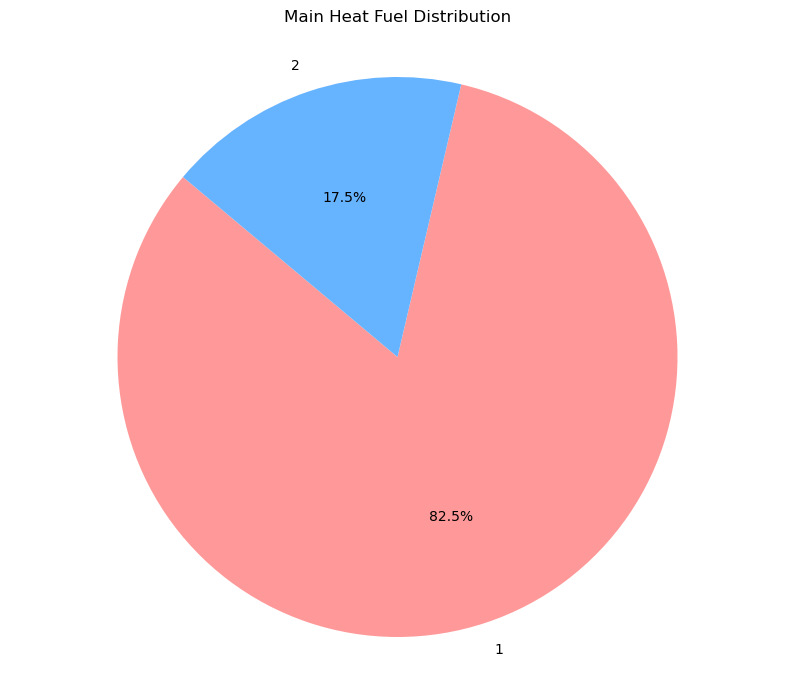

In [61]:
# Check the unique values and counts in the 'MAIN_HEAT_FUEL' column
main_heat_fuel_counts = data['MAIN_HEAT_FUEL'].value_counts()
# Pie charting
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels_int = main_heat_fuel_counts.index.astype(int)

plt.figure(figsize=(10, 8))
plt.pie(main_heat_fuel_counts, labels=labels_int, colors=colors,autopct='%1.1f%%', startangle=140)
plt.title('Main Heat Fuel Distribution', pad=20)
plt.axis('equal')  
plt.show()

# 3 Appropriate plots to communicate the distribution of key fields

## 3.1 Electricity consumption

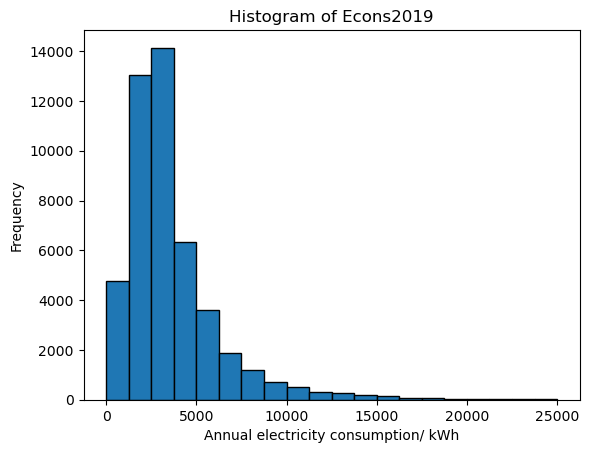

In [5]:
# select the column
column_to_plot = "Econs2019"
data_to_plot = data[column_to_plot]

# histograms
plt.hist(data_to_plot, bins=20, edgecolor='black')  

# set the title and axis labels
plt.title(f"Histogram of {column_to_plot}")
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# show plot
plt.show()

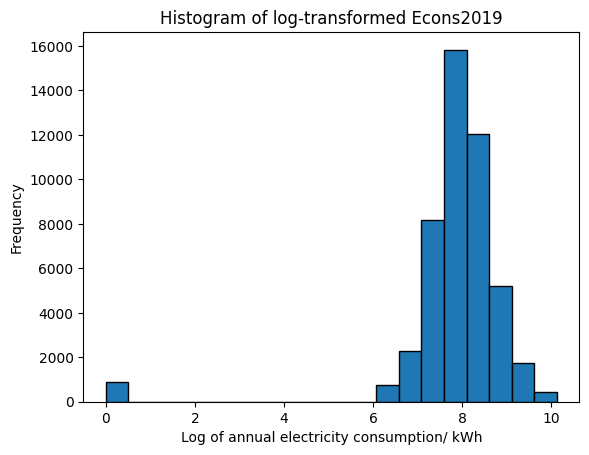

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# select the column
column_to_plot = "Econs2019"
data_to_plot = data[column_to_plot]

# apply log1p transformation
log_data_to_plot = np.log1p(data_to_plot)

# histograms
plt.hist(log_data_to_plot, bins=20, edgecolor='black')  

# set the title and axis labels
plt.title(f"Histogram of log-transformed {column_to_plot}")
plt.xlabel("Log of annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# show plot
plt.show()


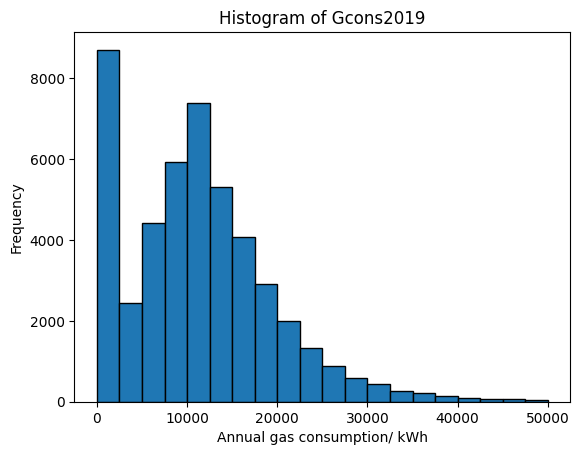

In [6]:
# select the column
column_to_plot = "Gcons2019"
data_to_plot = data[column_to_plot]

# histograms
plt.hist(data_to_plot, bins=20, edgecolor='black')  

# set the title and axis labels
plt.title(f"Histogram of {column_to_plot}")
plt.xlabel("Annual gas consumption/ kWh")
plt.ylabel("Frequency")

# show plot
plt.show()

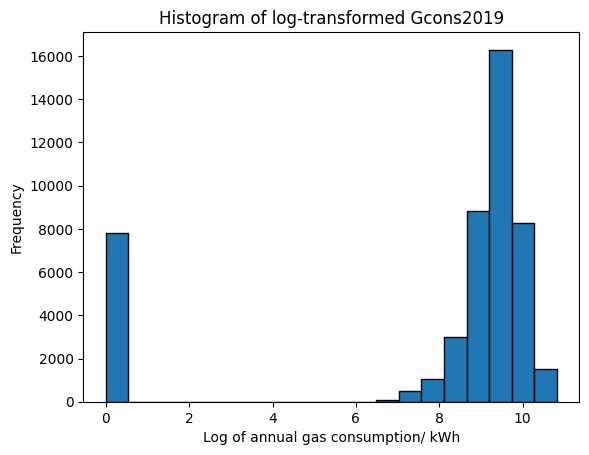

In [8]:
# select the column
column_to_plot = "Gcons2019"
data_to_plot = data[column_to_plot]

# apply log1p transformation
log_data_to_plot = np.log1p(data_to_plot)

# histograms
plt.hist(log_data_to_plot, bins=20, edgecolor='black')  

# set the title and axis labels
plt.title(f"Histogram of log-transformed {column_to_plot}")
plt.xlabel("Log of annual gas consumption/ kWh")
plt.ylabel("Frequency")

# show plot
plt.show()


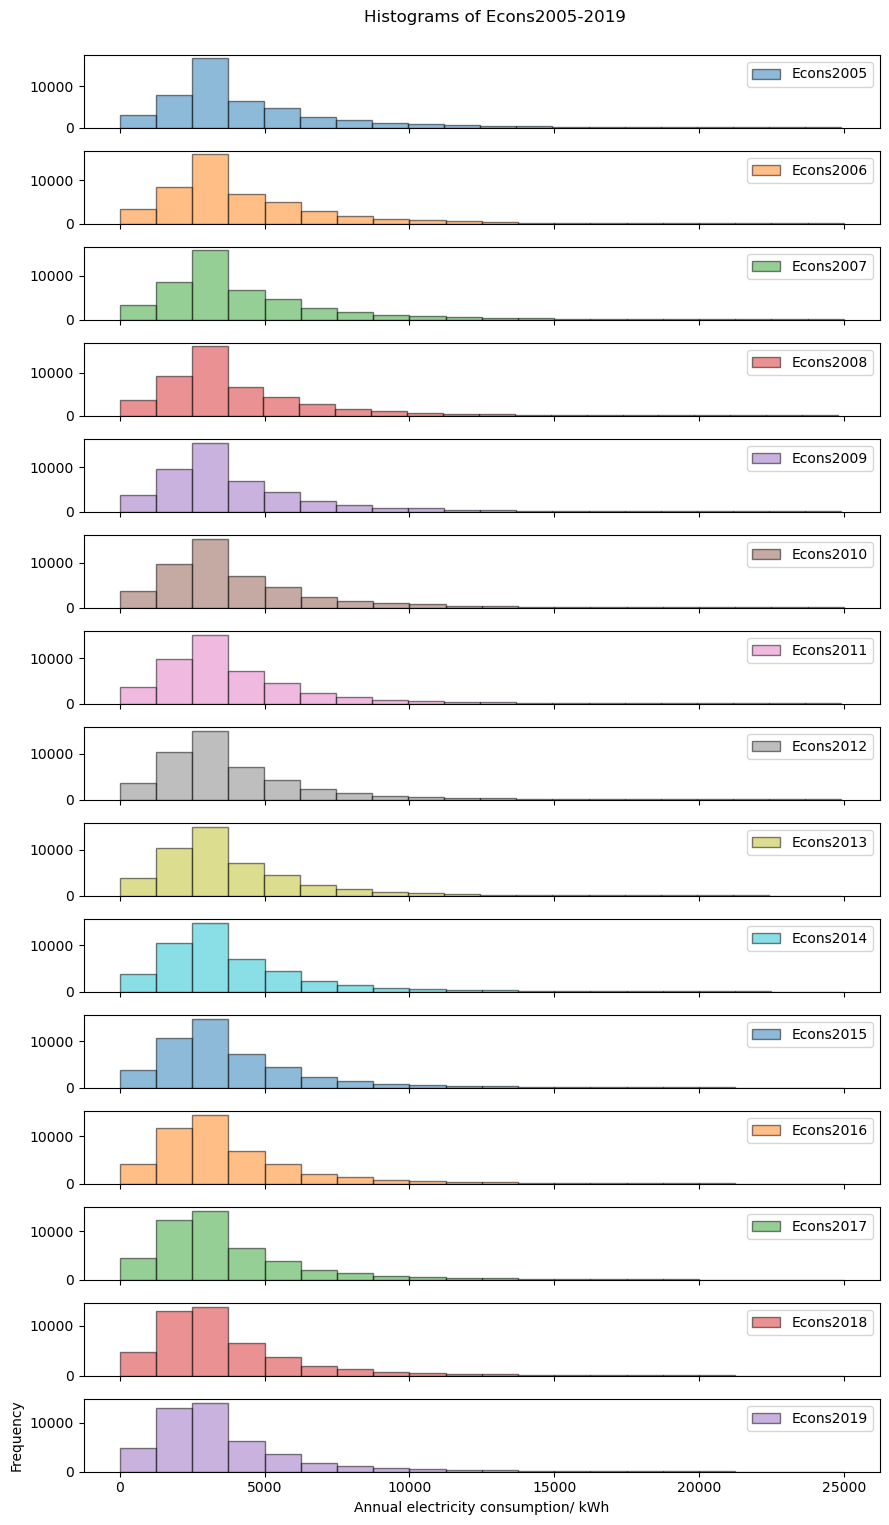

In [9]:
econs_columns = ["Econs2005", "Econs2006", "Econs2007", "Econs2008","Econs2009", 
                   "Econs2010", "Econs2011", "Econs2012", "Econs2013", "Econs2014", 
                   "Econs2015", "Econs2016", "Econs2017", "Econs2018", "Econs2019"
                  ]

fig, axs = plt.subplots(len(econs_columns), 1, figsize=(10, 16), sharex=True, sharey=False)

# histograms
for i, column in enumerate(econs_columns):
    data_to_plot = data[column]
    bins = 20  
    
    axs[i].hist(data_to_plot,color=f'C{i}', bins=bins,  edgecolor="black", alpha=0.5, label=column)
  
    # add legends for the small figures
    axs[i].legend()

# set the title and axis labels
plt.suptitle("Histograms of Econs2005-2019", y=0.95)
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# adjust the layout
plt.tight_layout(rect=[0, 0, 0.9, 0.95])  

# show plot
plt.show()

# 4  Appropriate plots to illustrate the relationship between key fields

## 4.1 Histogram - Electricity Consumption

#### 4.1.1 PROP_TYPE

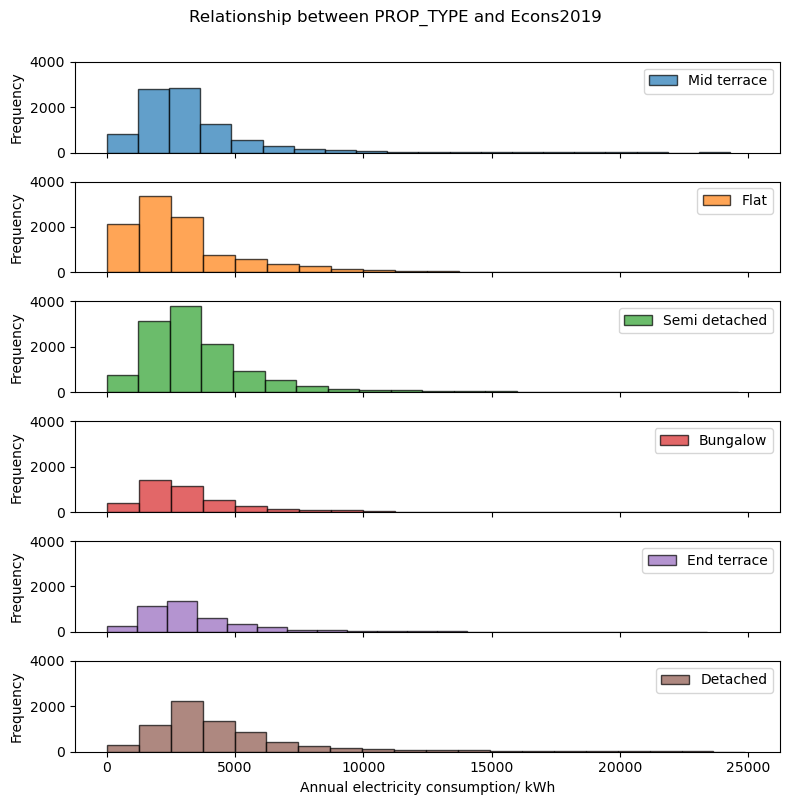

In [17]:
# Assuming data is a predefined DataFrame
prop_types = data['PROP_TYPE'].unique()

# Create plot
fig, axes = plt.subplots(nrows=len(prop_types), ncols=1, figsize=(8, 8), sharex=True)

# Histograms
for i, (prop_type, ax) in enumerate(zip(prop_types, axes)):
    subset = data[data['PROP_TYPE'] == prop_type]
    subset['Econs2019'].plot(kind='hist', bins=20, color=f'C{i}',  edgecolor="black",alpha=0.7, ax=ax, label=prop_type)

    # Set y-axis range for each subplot
    ax.set_ylim(0, 4000)
    
    ax.legend()  # add legends for the small figures

# Set the title and axis labels
plt.suptitle("Relationship between PROP_TYPE and Econs2019", y=1)
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# Adjust the layout
plt.tight_layout()
plt.show()


#### 4.1.2 PROP_AGE_BAND

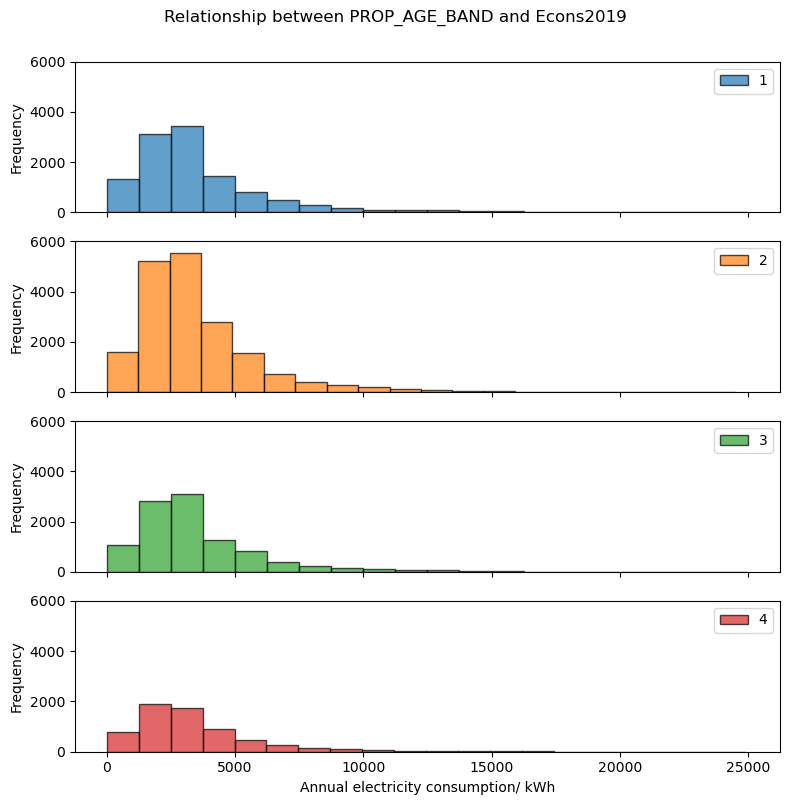

In [22]:
# Assuming data is a predefined DataFrame
a_types = data['PROP_AGE_BAND'].unique()

# Sort FLOOR_AREA_BAND in ascending order
a_types = sorted(a_types)

# Create plot
fig, axes = plt.subplots(nrows=len(a_types), ncols=1, figsize=(8, 8), sharex=True)

# Histograms
for i, (prop_type, ax) in enumerate(zip(a_types, axes)):
    subset = data[data['PROP_AGE_BAND'] == prop_type]
    subset['Econs2019'].plot(kind='hist', bins=20, color=f'C{i}',  edgecolor="black",alpha=0.7, ax=ax, label=prop_type)

    # Set y-axis range for each subplot
    ax.set_ylim(0, 6000)
    
    ax.legend()  # add legends for the small figures

# Set the title and axis labels
plt.suptitle("Relationship between PROP_AGE_BAND and Econs2019", y=1)
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# Adjust the layout
plt.tight_layout()
plt.show()


#### 4.1.3 FLOOR_AREA_BAND

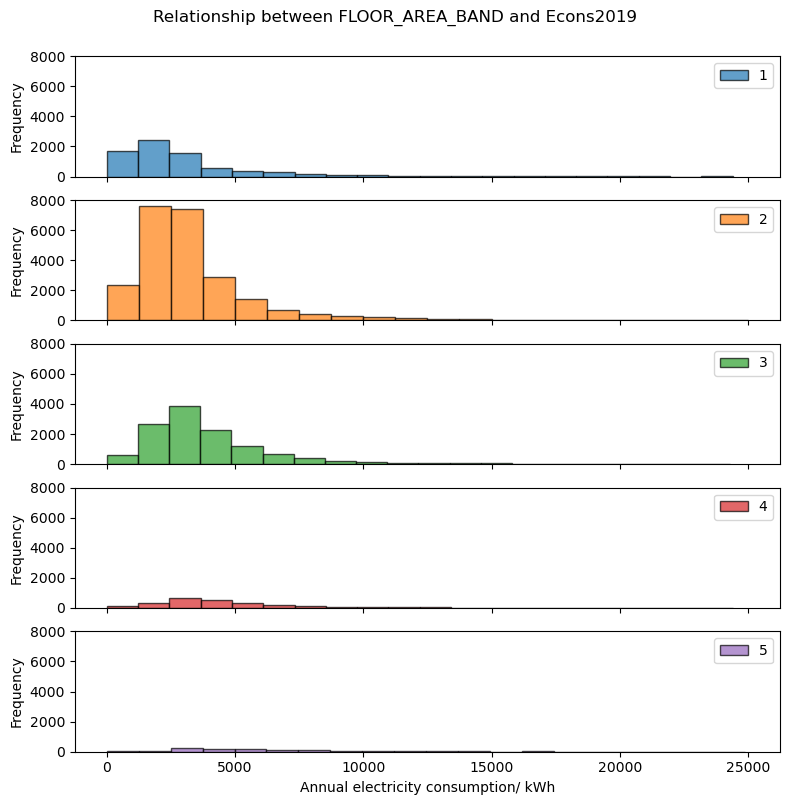

In [25]:
# Assuming data is a predefined DataFrame
a_types = data['FLOOR_AREA_BAND'].unique()

# Sort FLOOR_AREA_BAND in ascending order
a_types = sorted(a_types)

# Create plot
fig, axes = plt.subplots(nrows=len(a_types), ncols=1, figsize=(8, 8), sharex=True)

# Histograms
for i, (prop_type, ax) in enumerate(zip(a_types, axes)):
    subset = data[data['FLOOR_AREA_BAND'] == prop_type]
    subset['Econs2019'].plot(kind='hist', bins=20, color=f'C{i}',  edgecolor="black",alpha=0.7, ax=ax, label=prop_type)

    # Set y-axis range for each subplot
    ax.set_ylim(0, 8000)
    
    ax.legend()  # add legends for the small figures

# Set the title and axis labels
plt.suptitle("Relationship between FLOOR_AREA_BAND and Econs2019", y=1)
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# Adjust the layout
plt.tight_layout()
plt.show()

#### 4.1.4 COUNCIL_TAX_BAND

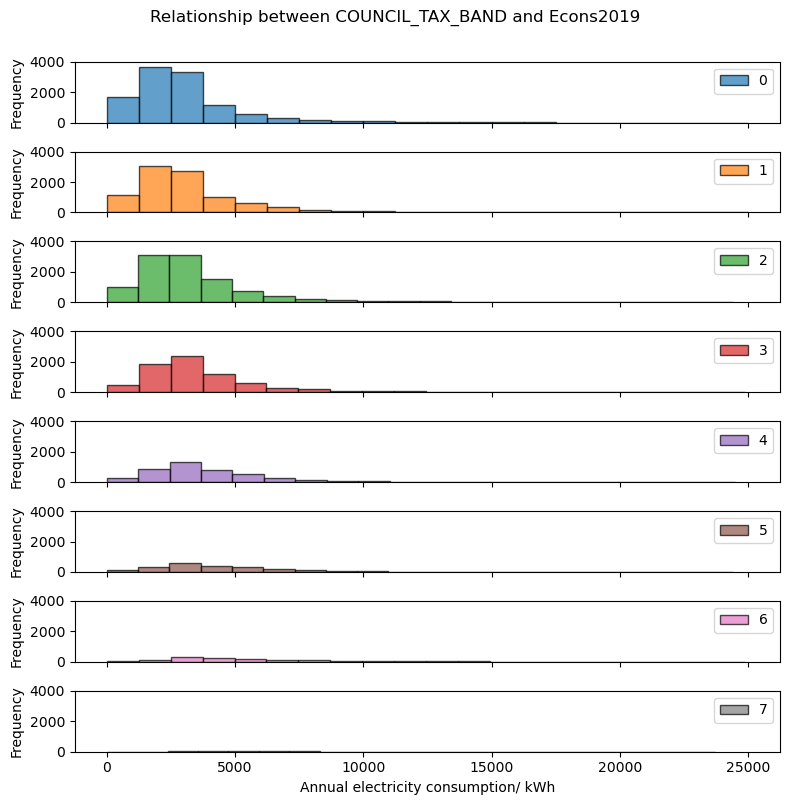

In [27]:
# Assuming data is a predefined DataFrame
a_types = data['COUNCIL_TAX_BAND'].unique()

# Sort FLOOR_AREA_BAND in ascending order
a_types = sorted(a_types)

# Create plot
fig, axes = plt.subplots(nrows=len(a_types), ncols=1, figsize=(8, 8), sharex=True)

# Histograms
for i, (prop_type, ax) in enumerate(zip(a_types, axes)):
    subset = data[data['COUNCIL_TAX_BAND'] == prop_type]
    subset['Econs2019'].plot(kind='hist', bins=20, color=f'C{i}',  edgecolor="black",alpha=0.7, ax=ax, label=prop_type)

    # Set y-axis range for each subplot
    ax.set_ylim(0, 4000)
    
    ax.legend()  # add legends for the small figures

# Set the title and axis labels
plt.suptitle("Relationship between COUNCIL_TAX_BAND and Econs2019", y=1)
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# Adjust the layout
plt.tight_layout()
plt.show()

#### 4.1.5 IMD_BAND_ENG

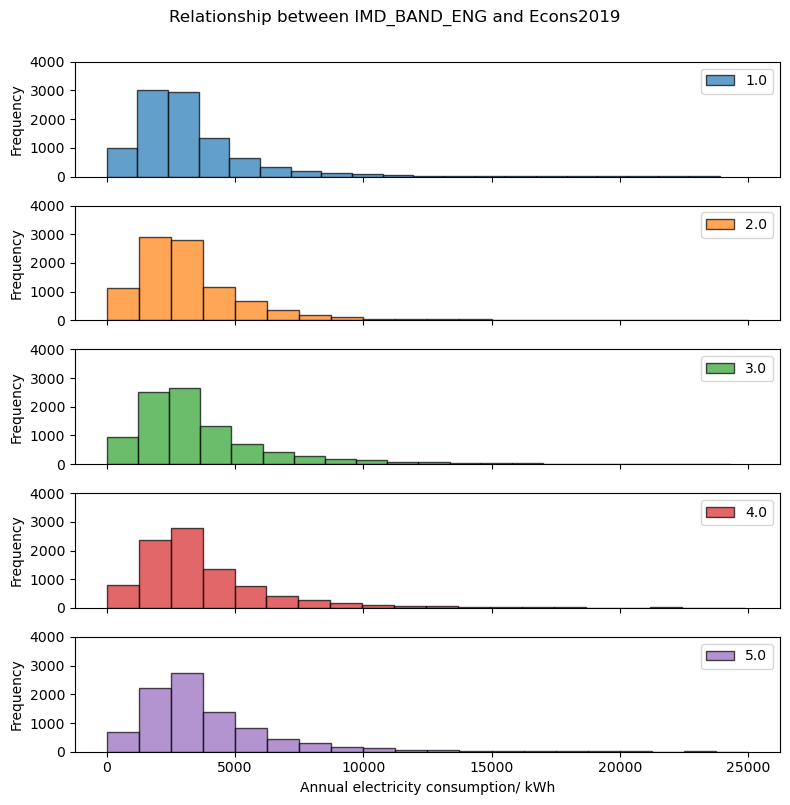

In [28]:
# Assuming data is a predefined DataFrame
a_types = data['IMD_BAND_ENG'].unique()

# Sort FLOOR_AREA_BAND in ascending order
a_types = sorted(a_types)

# Create plot
fig, axes = plt.subplots(nrows=len(a_types), ncols=1, figsize=(8, 8), sharex=True)

# Histograms
for i, (prop_type, ax) in enumerate(zip(a_types, axes)):
    subset = data[data['IMD_BAND_ENG'] == prop_type]
    subset['Econs2019'].plot(kind='hist', bins=20, color=f'C{i}',  edgecolor="black",alpha=0.7, ax=ax, label=prop_type)

    # Set y-axis range for each subplot
    ax.set_ylim(0, 4000)
    
    ax.legend()  # add legends for the small figures

# Set the title and axis labels
plt.suptitle("Relationship between IMD_BAND_ENG and Econs2019", y=1)
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# Adjust the layout
plt.tight_layout()
plt.show()

#### 4.1.6 REGION

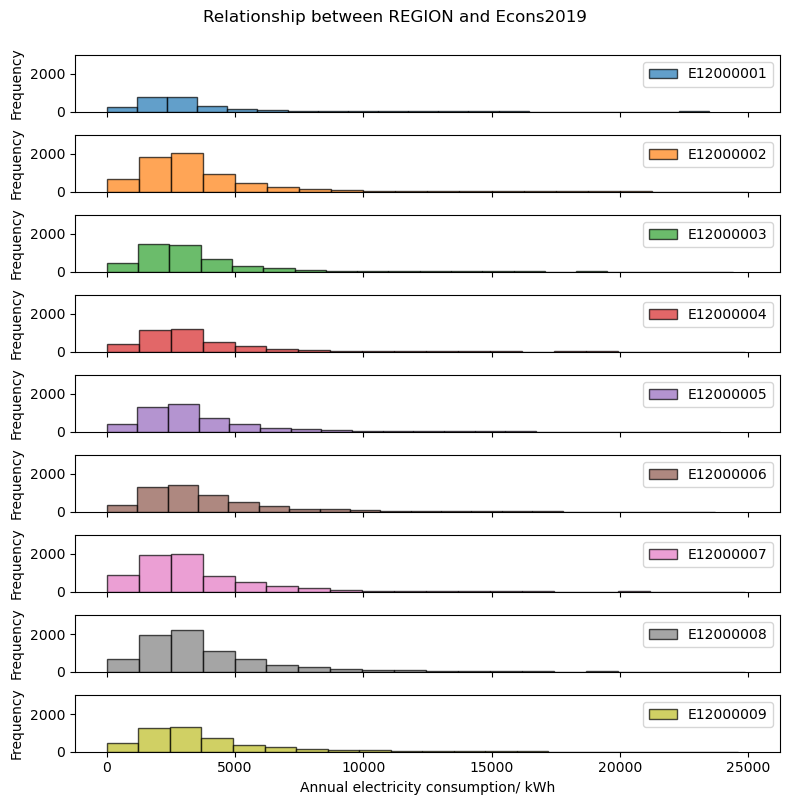

In [32]:
# Assuming data is a predefined DataFrame
a_types = data['REGION'].unique()

# Sort FLOOR_AREA_BAND in ascending order
a_types = sorted(a_types)

# Create plot
fig, axes = plt.subplots(nrows=len(a_types), ncols=1, figsize=(8, 8), sharex=True)

# Histograms
for i, (prop_type, ax) in enumerate(zip(a_types, axes)):
    subset = data[data['REGION'] == prop_type]
    subset['Econs2019'].plot(kind='hist', bins=20, color=f'C{i}',  edgecolor="black",alpha=0.7, ax=ax, label=prop_type)

    # Set y-axis range for each subplot
    ax.set_ylim(0, 3000)
    
    ax.legend()  # add legends for the small figures

# Set the title and axis labels
plt.suptitle("Relationship between REGION and Econs2019", y=1)
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# Adjust the layout
plt.tight_layout()
plt.show()

#### 4.1.7 LI_FLAG

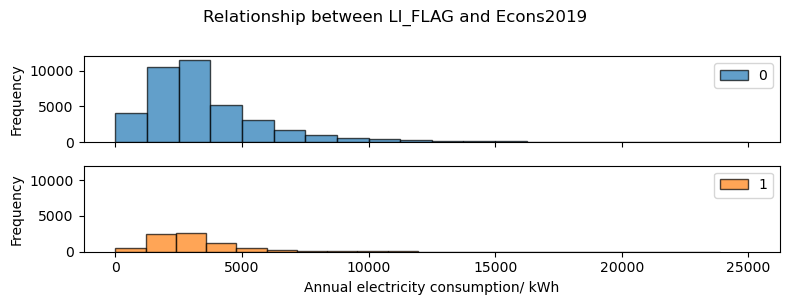

In [34]:
# Assuming data is a predefined DataFrame
a_types = data['LI_FLAG'].unique()

# Sort FLOOR_AREA_BAND in ascending order
a_types = sorted(a_types)

# Create plot
fig, axes = plt.subplots(nrows=len(a_types), ncols=1, figsize=(8, 3), sharex=True)

# Histograms
for i, (prop_type, ax) in enumerate(zip(a_types, axes)):
    subset = data[data['LI_FLAG'] == prop_type]
    subset['Econs2019'].plot(kind='hist', bins=20, color=f'C{i}',  edgecolor="black",alpha=0.7, ax=ax, label=prop_type)

    # Set y-axis range for each subplot
    ax.set_ylim(0, 12000)
    
    ax.legend()  # add legends for the small figures

# Set the title and axis labels
plt.suptitle("Relationship between LI_FLAG and Econs2019", y=1)
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# Adjust the layout
plt.tight_layout()
plt.show()

#### 4.1.8  CWI_FLAG

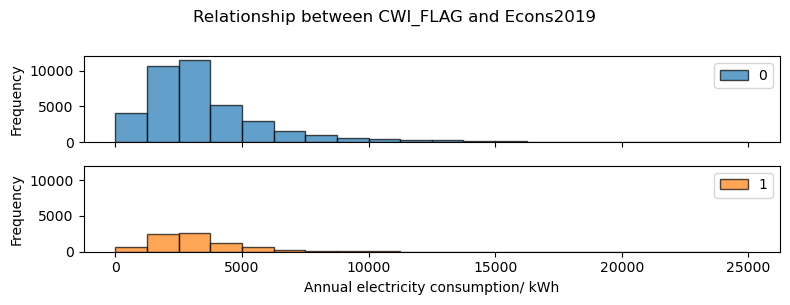

In [36]:
# Assuming data is a predefined DataFrame
a_types = data['CWI_FLAG'].unique()

# Sort FLOOR_AREA_BAND in ascending order
a_types = sorted(a_types)

# Create plot
fig, axes = plt.subplots(nrows=len(a_types), ncols=1, figsize=(8, 3), sharex=True)

# Histograms
for i, (prop_type, ax) in enumerate(zip(a_types, axes)):
    subset = data[data['CWI_FLAG'] == prop_type]
    subset['Econs2019'].plot(kind='hist', bins=20, color=f'C{i}',  edgecolor="black",alpha=0.7, ax=ax, label=prop_type)

    # Set y-axis range for each subplot
    ax.set_ylim(0, 12000)
    
    ax.legend()  # add legends for the small figures

# Set the title and axis labels
plt.suptitle("Relationship between CWI_FLAG and Econs2019", y=1)
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# Adjust the layout
plt.tight_layout()
plt.show()

#### 4.1.9 PV_FLAG

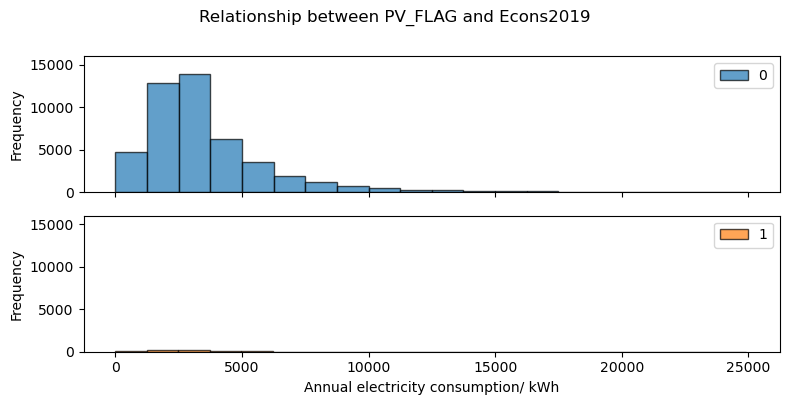

In [40]:
# Assuming data is a predefined DataFrame
a_types = data['PV_FLAG'].unique()

# Sort FLOOR_AREA_BAND in ascending order
a_types = sorted(a_types)

# Create plot
fig, axes = plt.subplots(nrows=len(a_types), ncols=1, figsize=(8, 4), sharex=True)

# Histograms
for i, (prop_type, ax) in enumerate(zip(a_types, axes)):
    subset = data[data['PV_FLAG'] == prop_type]
    subset['Econs2019'].plot(kind='hist', bins=20, color=f'C{i}',  edgecolor="black",alpha=0.7, ax=ax, label=prop_type)

    # Set y-axis range for each subplot
    ax.set_ylim(0, 16000)
    
    ax.legend()  # add legends for the small figures

# Set the title and axis labels
plt.suptitle("Relationship between PV_FLAG and Econs2019", y=1)
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# Adjust the layout
plt.tight_layout()
plt.show()

#### 4.1.10 MAIN_HEAT_FUEL

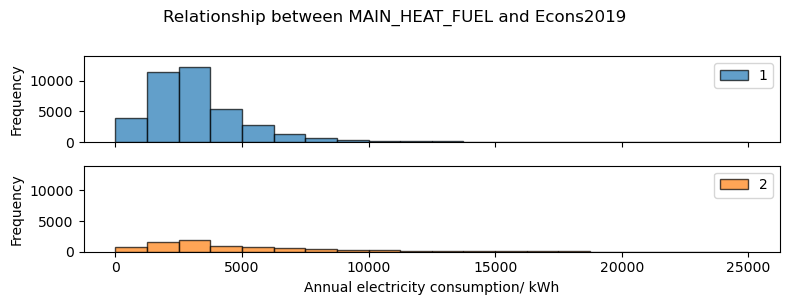

In [42]:
# Assuming data is a predefined DataFrame
a_types = data['MAIN_HEAT_FUEL'].unique()

# Sort FLOOR_AREA_BAND in ascending order
a_types = sorted(a_types)

# Create plot
fig, axes = plt.subplots(nrows=len(a_types), ncols=1, figsize=(8, 3), sharex=True)

# Histograms
for i, (prop_type, ax) in enumerate(zip(a_types, axes)):
    subset = data[data['MAIN_HEAT_FUEL'] == prop_type]
    subset['Econs2019'].plot(kind='hist', bins=20, color=f'C{i}',  edgecolor="black",alpha=0.7, ax=ax, label=prop_type)

    # Set y-axis range for each subplot
    ax.set_ylim(0, 14000)
    
    ax.legend()  # add legends for the small figures

# Set the title and axis labels
plt.suptitle("Relationship between MAIN_HEAT_FUEL and Econs2019", y=1)
plt.xlabel("Annual electricity consumption/ kWh")
plt.ylabel("Frequency")

# Adjust the layout
plt.tight_layout()
plt.show()

## 4.2 Linear regression analysis - Electricity Consumption

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns

                            OLS Regression Results                            
Dep. Variable:              Econs2019   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.122
Date:                Thu, 07 Dec 2023   Prob (F-statistic):              0.290
Time:                        00:33:14   Log-Likelihood:                -70570.
No. Observations:                7573   AIC:                         1.411e+05
Df Residuals:                    7571   BIC:                         1.412e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3638.4733     77.590     46.893

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

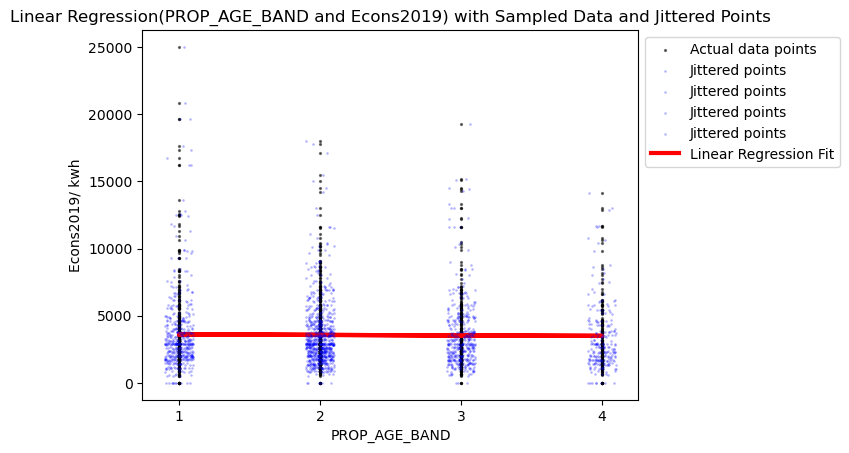

In [47]:
# Make sure the required columns exist
if 'PROP_AGE_BAND' not in data.columns or 'Econs2019' not in data.columns:
    print("Required columns not found in the dataset.")
    exit()

# Extract features (independent variables) and targets (dependent variables)
X = data[['PROP_AGE_BAND']]
y = data['Econs2019']

# Sample the data
sampled_data = data.sample(frac=0.2, random_state=42)  

# Extract the sampled features and targets
X_sampled = sampled_data[['PROP_AGE_BAND']]
y_sampled = sampled_data['Econs2019']

# Divide the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Add a constant column
X_train = sm.add_constant(X_train)

# Create a linear regression model
model = sm.OLS(y_train, X_train).fit()

# Output regression results, including p-values
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print mean squared error
print("Mean Squared Error:", mse)

# Draw scatter plots and fitted straight lines, adding random jitter

plt.scatter(X_test['PROP_AGE_BAND']-1, y_test, color='black', label='Actual data points', alpha=0.5, s=1.8)  
sns.stripplot(x=X_test['PROP_AGE_BAND'], y=y_test, jitter=True, color='blue', size=1.8, alpha=0.3, label='Jittered points')
plt.plot(X_test['PROP_AGE_BAND']-1, y_pred, color='red', linewidth=3, label='Linear Regression Fit')

plt.xlabel('PROP_AGE_BAND')
plt.ylabel('Econs2019/ kwh')
plt.title('Linear Regression(PROP_AGE_BAND and Econs2019) with Sampled Data and Jittered Points')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

                            OLS Regression Results                            
Dep. Variable:              Econs2019   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     550.0
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          1.79e-117
Time:                        00:34:18   Log-Likelihood:                -70305.
No. Observations:                7573   AIC:                         1.406e+05
Df Residuals:                    7571   BIC:                         1.406e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1777.2666     81.817     

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

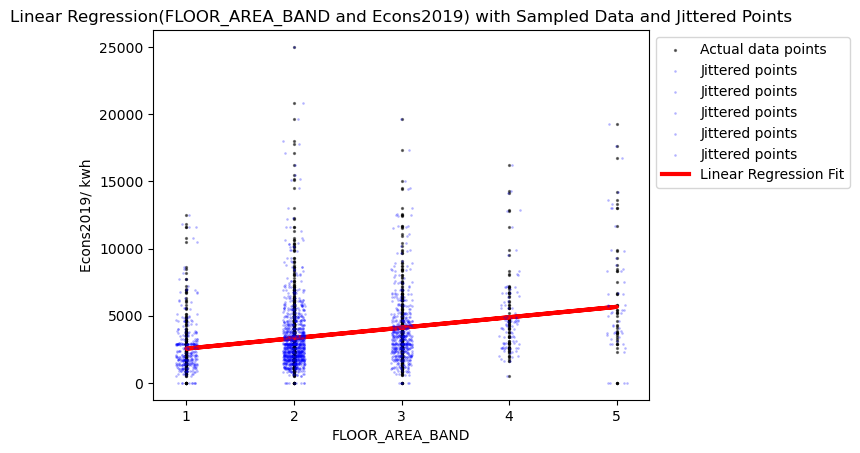

In [48]:
# Make sure the required columns exist
if 'FLOOR_AREA_BAND' not in data.columns or 'Econs2019' not in data.columns:
    print("Required columns not found in the dataset.")
    exit()

# Extract features (independent variables) and targets (dependent variables)
X = data[['FLOOR_AREA_BAND']]
y = data['Econs2019']

# Sample the data
sampled_data = data.sample(frac=0.2, random_state=42)  

# Extract the sampled features and targets
X_sampled = sampled_data[['FLOOR_AREA_BAND']]
y_sampled = sampled_data['Econs2019']

# Divide the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Add a constant column
X_train = sm.add_constant(X_train)

# Create a linear regression model
model = sm.OLS(y_train, X_train).fit()

# Output regression results, including p-values
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print mean squared error
print("Mean Squared Error:", mse)

# Draw scatter plots and fitted straight lines, adding random jitter

plt.scatter(X_test['FLOOR_AREA_BAND']-1, y_test, color='black', label='Actual data points', alpha=0.5, s=1.8)  
sns.stripplot(x=X_test['FLOOR_AREA_BAND'], y=y_test, jitter=True, color='blue', size=1.8, alpha=0.3, label='Jittered points')
plt.plot(X_test['FLOOR_AREA_BAND']-1, y_pred, color='red', linewidth=3, label='Linear Regression Fit')

plt.xlabel('FLOOR_AREA_BAND')
plt.ylabel('Econs2019/ kwh')
plt.title('Linear Regression(FLOOR_AREA_BAND and Econs2019) with Sampled Data and Jittered Points')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

                            OLS Regression Results                            
Dep. Variable:              Econs2019   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     459.2
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           5.84e-99
Time:                        00:35:37   Log-Likelihood:                -70347.
No. Observations:                7573   AIC:                         1.407e+05
Df Residuals:                    7571   BIC:                         1.407e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2800.7296     46.596  

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

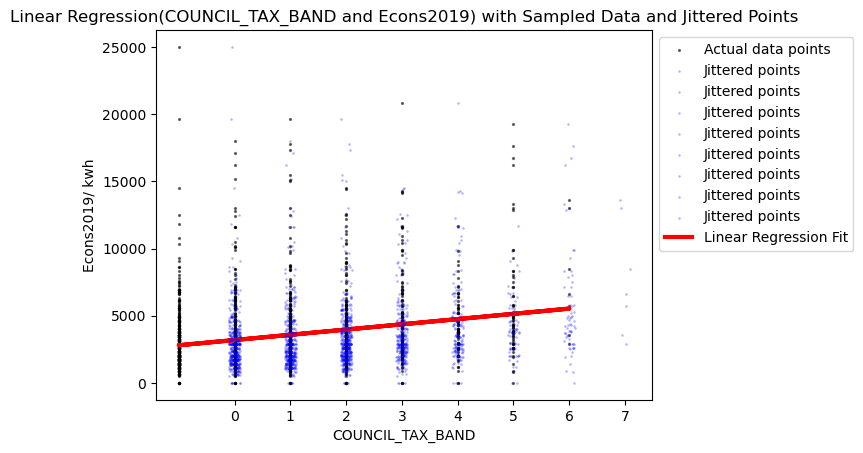

In [49]:
# Make sure the required columns exist
if 'COUNCIL_TAX_BAND' not in data.columns or 'Econs2019' not in data.columns:
    print("Required columns not found in the dataset.")
    exit()

# Extract features (independent variables) and targets (dependent variables)
X = data[['COUNCIL_TAX_BAND']]
y = data['Econs2019']

# Sample the data
sampled_data = data.sample(frac=0.2, random_state=42)  

# Extract the sampled features and targets
X_sampled = sampled_data[['COUNCIL_TAX_BAND']]
y_sampled = sampled_data['Econs2019']

# Divide the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Add a constant column
X_train = sm.add_constant(X_train)

# Create a linear regression model
model = sm.OLS(y_train, X_train).fit()

# Output regression results, including p-values
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print mean squared error
print("Mean Squared Error:", mse)

# Draw scatter plots and fitted straight lines, adding random jitter

plt.scatter(X_test['COUNCIL_TAX_BAND']-1, y_test, color='black', label='Actual data points', alpha=0.5, s=1.8)  
sns.stripplot(x=X_test['COUNCIL_TAX_BAND'], y=y_test, jitter=True, color='blue', size=1.8, alpha=0.3, label='Jittered points')
plt.plot(X_test['COUNCIL_TAX_BAND']-1, y_pred, color='red', linewidth=3, label='Linear Regression Fit')

plt.xlabel('COUNCIL_TAX_BAND')
plt.ylabel('Econs2019/ kwh')
plt.title('Linear Regression(COUNCIL_TAX_BAND and Econs2019) with Sampled Data and Jittered Points')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

                            OLS Regression Results                            
Dep. Variable:              Econs2019   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     74.56
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           7.09e-18
Time:                        00:36:15   Log-Likelihood:                -70533.
No. Observations:                7573   AIC:                         1.411e+05
Df Residuals:                    7571   BIC:                         1.411e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3010.7262     71.019     42.393   

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

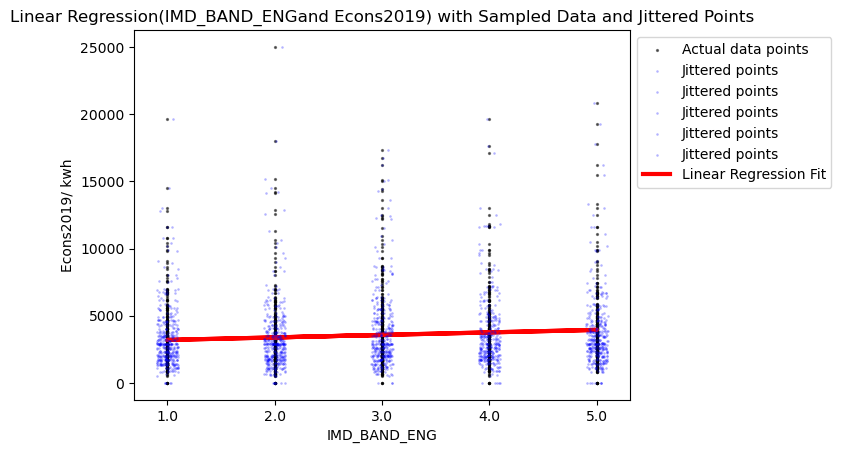

In [50]:
# Make sure the required columns exist
if 'IMD_BAND_ENG' not in data.columns or 'Econs2019' not in data.columns:
    print("Required columns not found in the dataset.")
    exit()

# Extract features (independent variables) and targets (dependent variables)
X = data[['IMD_BAND_ENG']]
y = data['Econs2019']

# Sample the data
sampled_data = data.sample(frac=0.2, random_state=42)  

# Extract the sampled features and targets
X_sampled = sampled_data[['IMD_BAND_ENG']]
y_sampled = sampled_data['Econs2019']

# Divide the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Add a constant column
X_train = sm.add_constant(X_train)

# Create a linear regression model
model = sm.OLS(y_train, X_train).fit()

# Output regression results, including p-values
print(model.summary())

# Make predictions on the test set
X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print mean squared error
print("Mean Squared Error:", mse)

# Draw scatter plots and fitted straight lines, adding random jitter

plt.scatter(X_test['IMD_BAND_ENG']-1, y_test, color='black', label='Actual data points', alpha=0.5, s=1.8)  
sns.stripplot(x=X_test['IMD_BAND_ENG'], y=y_test, jitter=True, color='blue', size=1.8, alpha=0.3, label='Jittered points')
plt.plot(X_test['IMD_BAND_ENG']-1, y_pred, color='red', linewidth=3, label='Linear Regression Fit')

plt.xlabel('IMD_BAND_ENG')
plt.ylabel('Econs2019/ kwh')
plt.title('Linear Regression(IMD_BAND_ENGand Econs2019) with Sampled Data and Jittered Points')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()